<a href="https://colab.research.google.com/github/norannali/norannali/blob/main/Daily_Climate_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

# **Reading data**

In [3]:
df_train=pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df_test=pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [4]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [7]:
df_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


* Data Training,Testing have no Null Values
* Type of date col is datetime64 ,others are float

* Convert 'date' column to datetime and set as index
* (Important for time series analysis and consistent format with train data)

# **Analysis Data**

In [10]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.set_index('date', inplace=True)

In [11]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test.set_index('date', inplace=True)

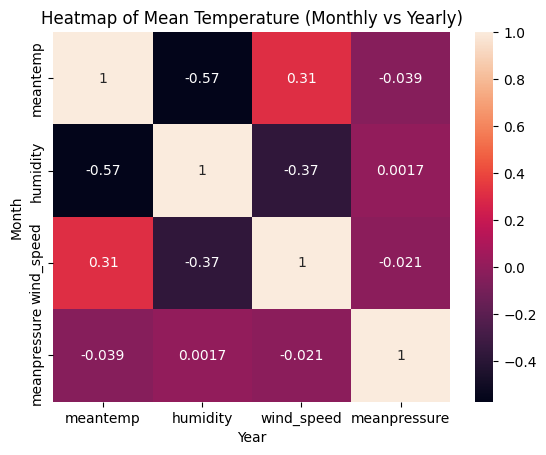

In [12]:
sns.heatmap(df_train.corr(),annot=True)
plt.title("Heatmap of Mean Temperature (Monthly vs Yearly)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

In [13]:
df_train['year'] = df_train.index.year
df_train['month'] = df_train.index.month
df_train['day_name'] = df_train.index.strftime('%A')
df_train

,meantemp,humidity,wind_speed,meanpressure,year,month,day_name
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,Tuesday
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,Wednesday
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,Thursday
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,Friday
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,Saturday
...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12,Wednesday
2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12,Thursday
2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12,Friday


In [14]:
df_test['year'] = df_test.index.year
df_test['month'] = df_test.index.month
df_test['day_name'] = df_test.index.strftime('%A')
df_test

,meantemp,humidity,wind_speed,meanpressure,year,month,day_name
date,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1,Sunday
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1,Monday
2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1,Tuesday
2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1,Wednesday
2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1,Thursday
...,...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,2017,4,Thursday
2017-04-21,34.250000,39.375000,6.962500,999.875000,2017,4,Friday
2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017,4,Saturday


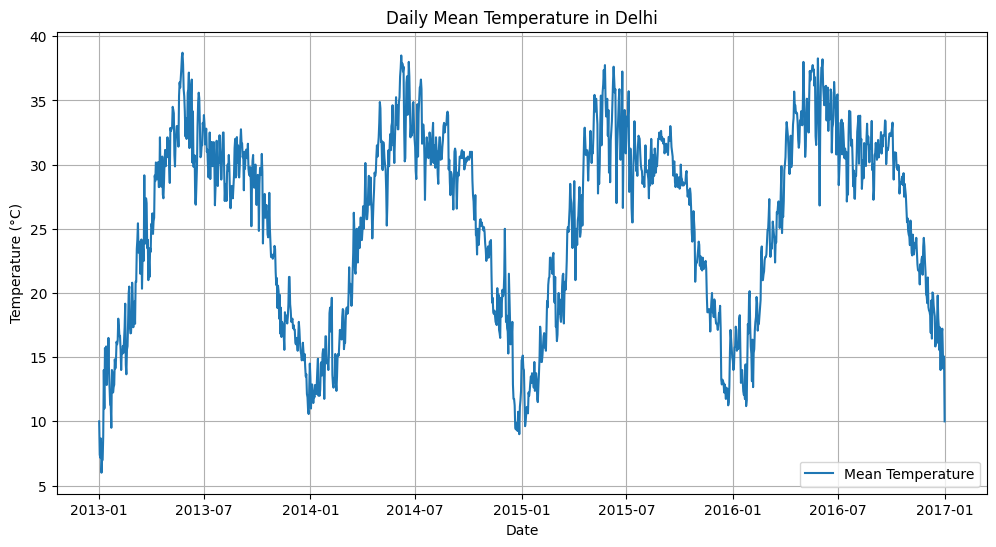

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df_train['meantemp'], label='Mean Temperature')
plt.title("Daily Mean Temperature in Delhi")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

In [16]:
print(df_train.index.min())
print(df_train.index.max())

2013-01-01 00:00:00
2017-01-01 00:00:00


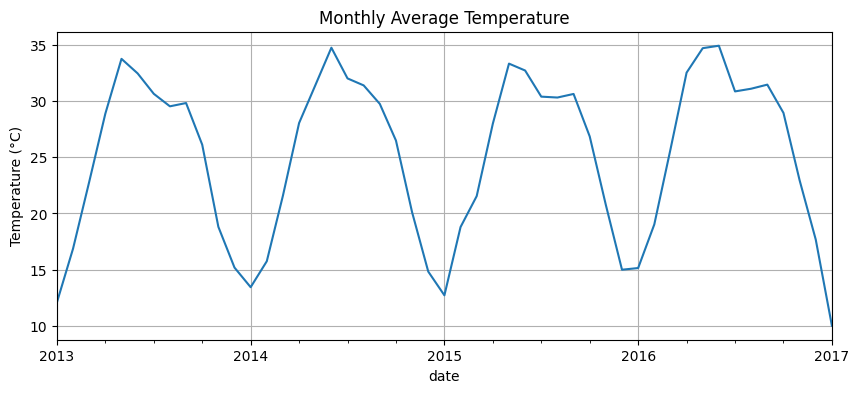

In [17]:
monthly_avg = df_train['meantemp'].resample('M').mean()
monthly_avg.plot(figsize=(10, 4), title="Monthly Average Temperature")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()


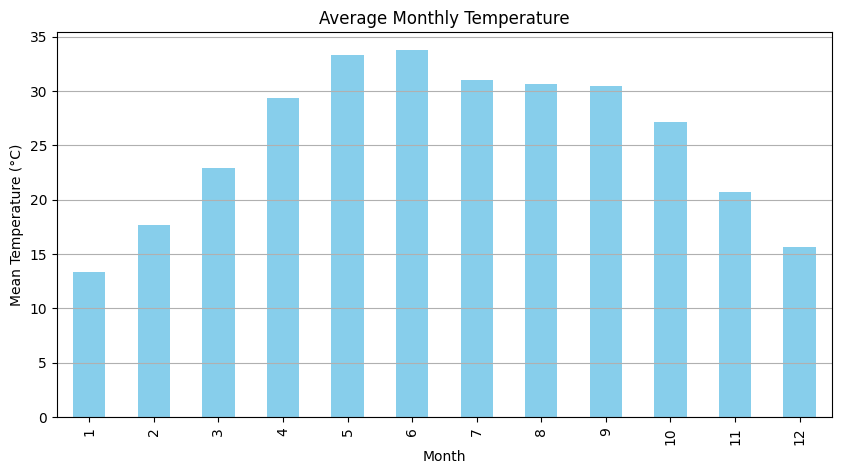

In [18]:
plt.figure(figsize=(10, 5))
df_train.groupby('month')['meantemp'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.grid(axis='y')
plt.show()

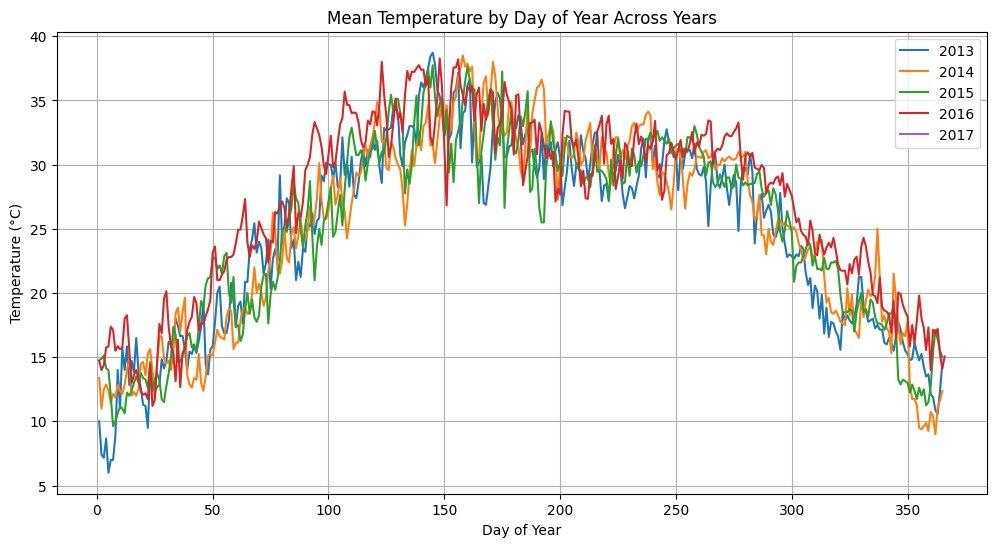

In [19]:
plt.figure(figsize=(12, 6))

for year in df_train['year'].unique():
    subset = df_train[df_train['year'] == year]
    plt.plot(subset.index.dayofyear, subset['meantemp'], label=str(year))

plt.legend()
plt.title("Mean Temperature by Day of Year Across Years")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

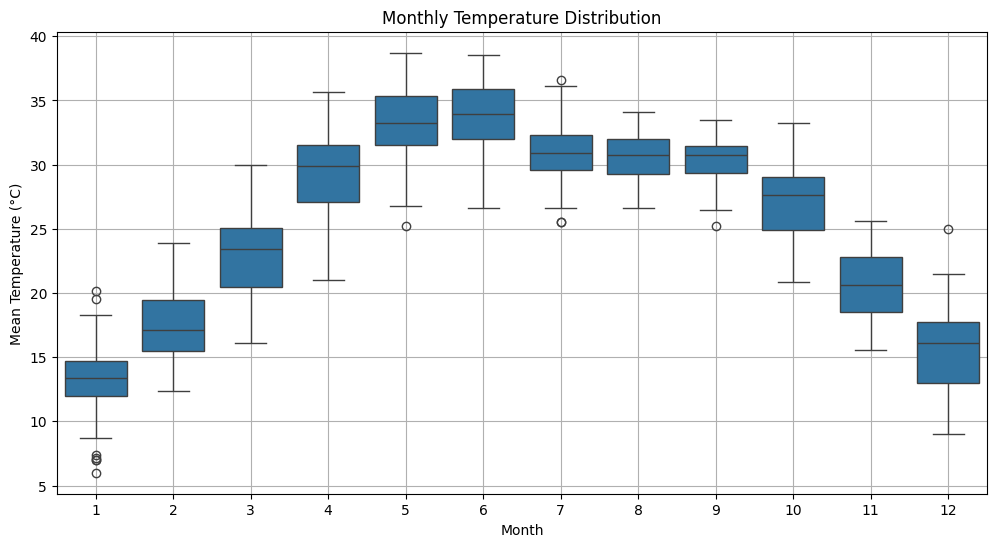

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='meantemp', data=df_train)
plt.title("Monthly Temperature Distribution")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.grid(True)
plt.show()

In [21]:
df_train.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month',
       'day_name'],
      dtype='object')

In [22]:
columns=df_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

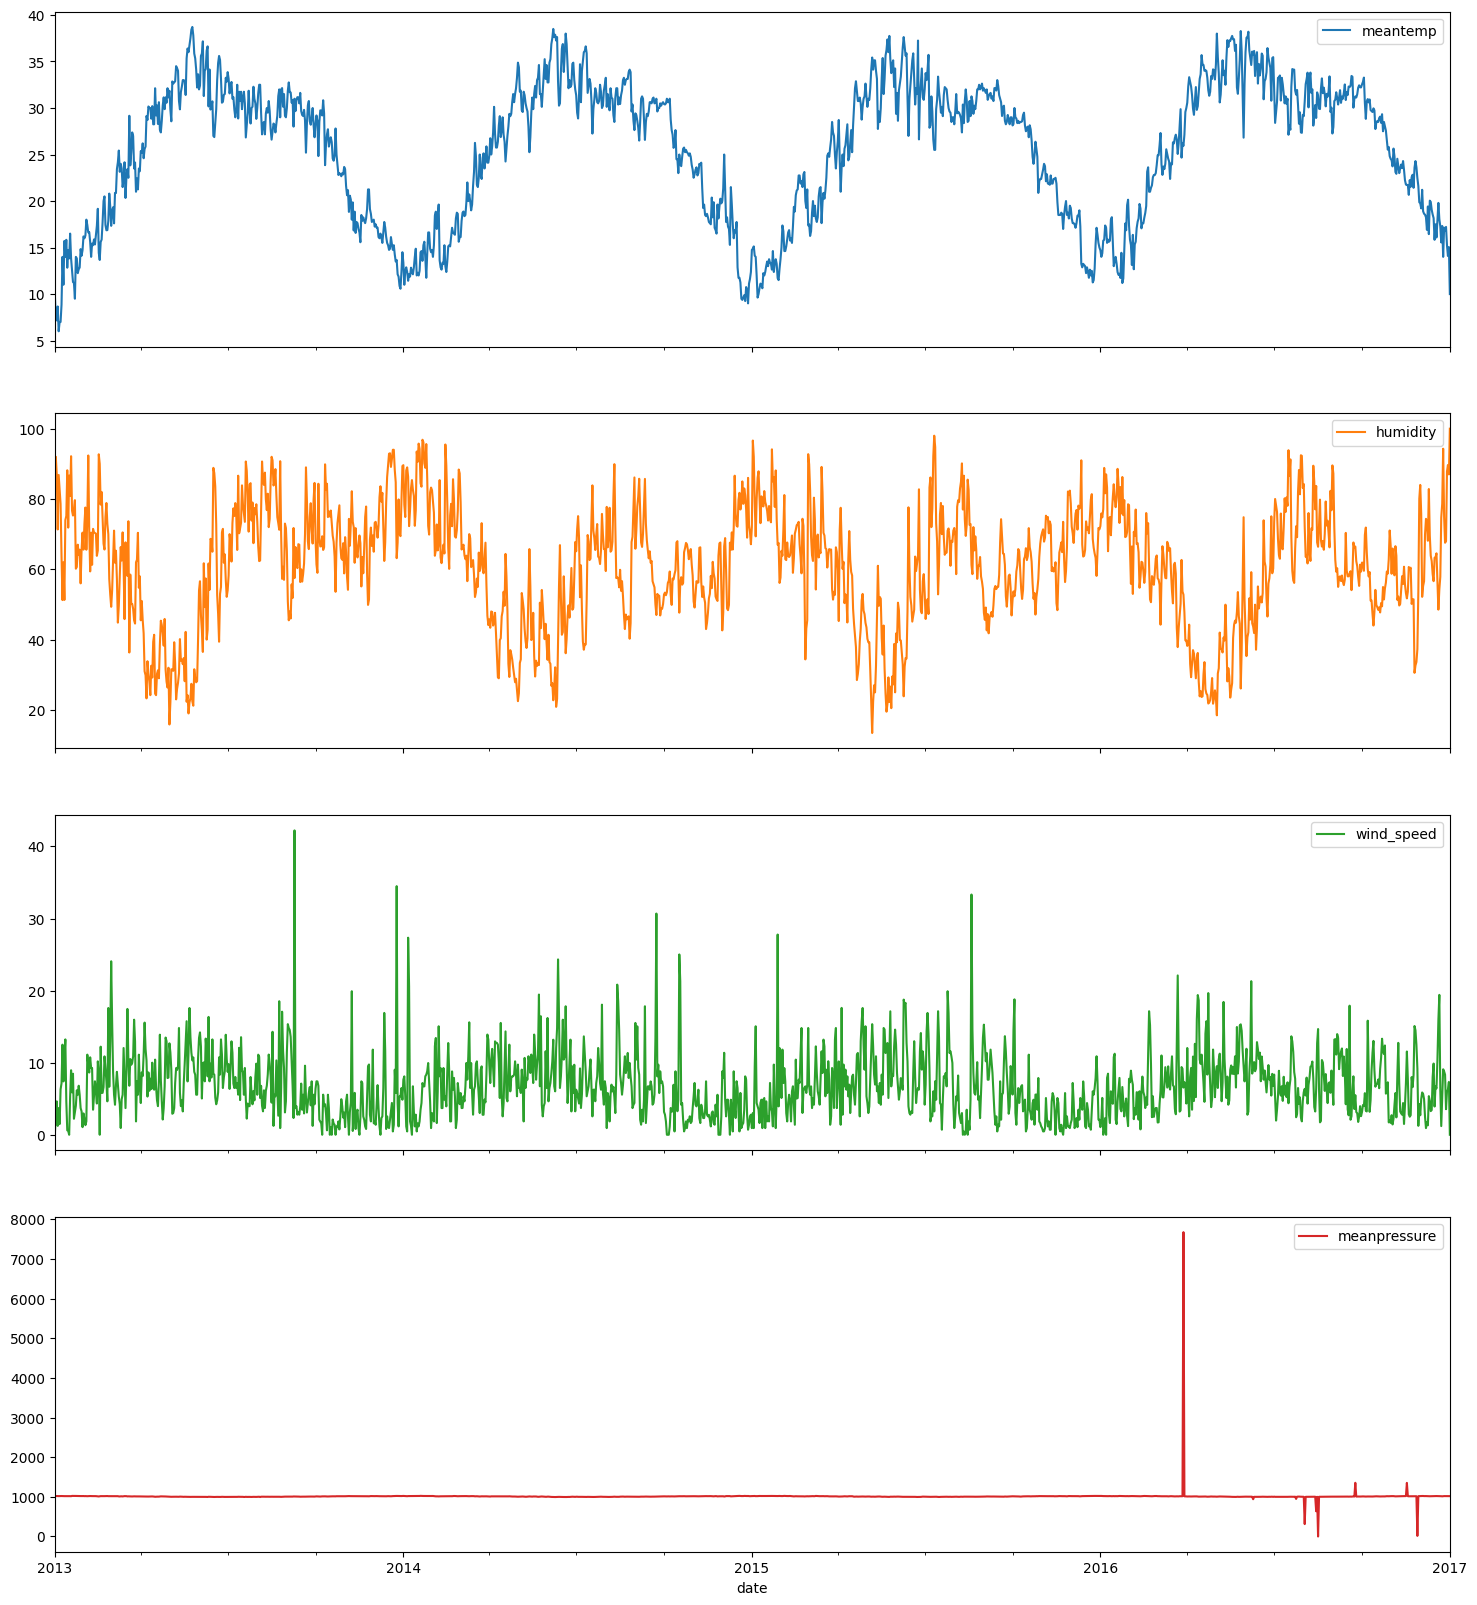

In [23]:
columns.plot(figsize=(18,20),subplots=True)

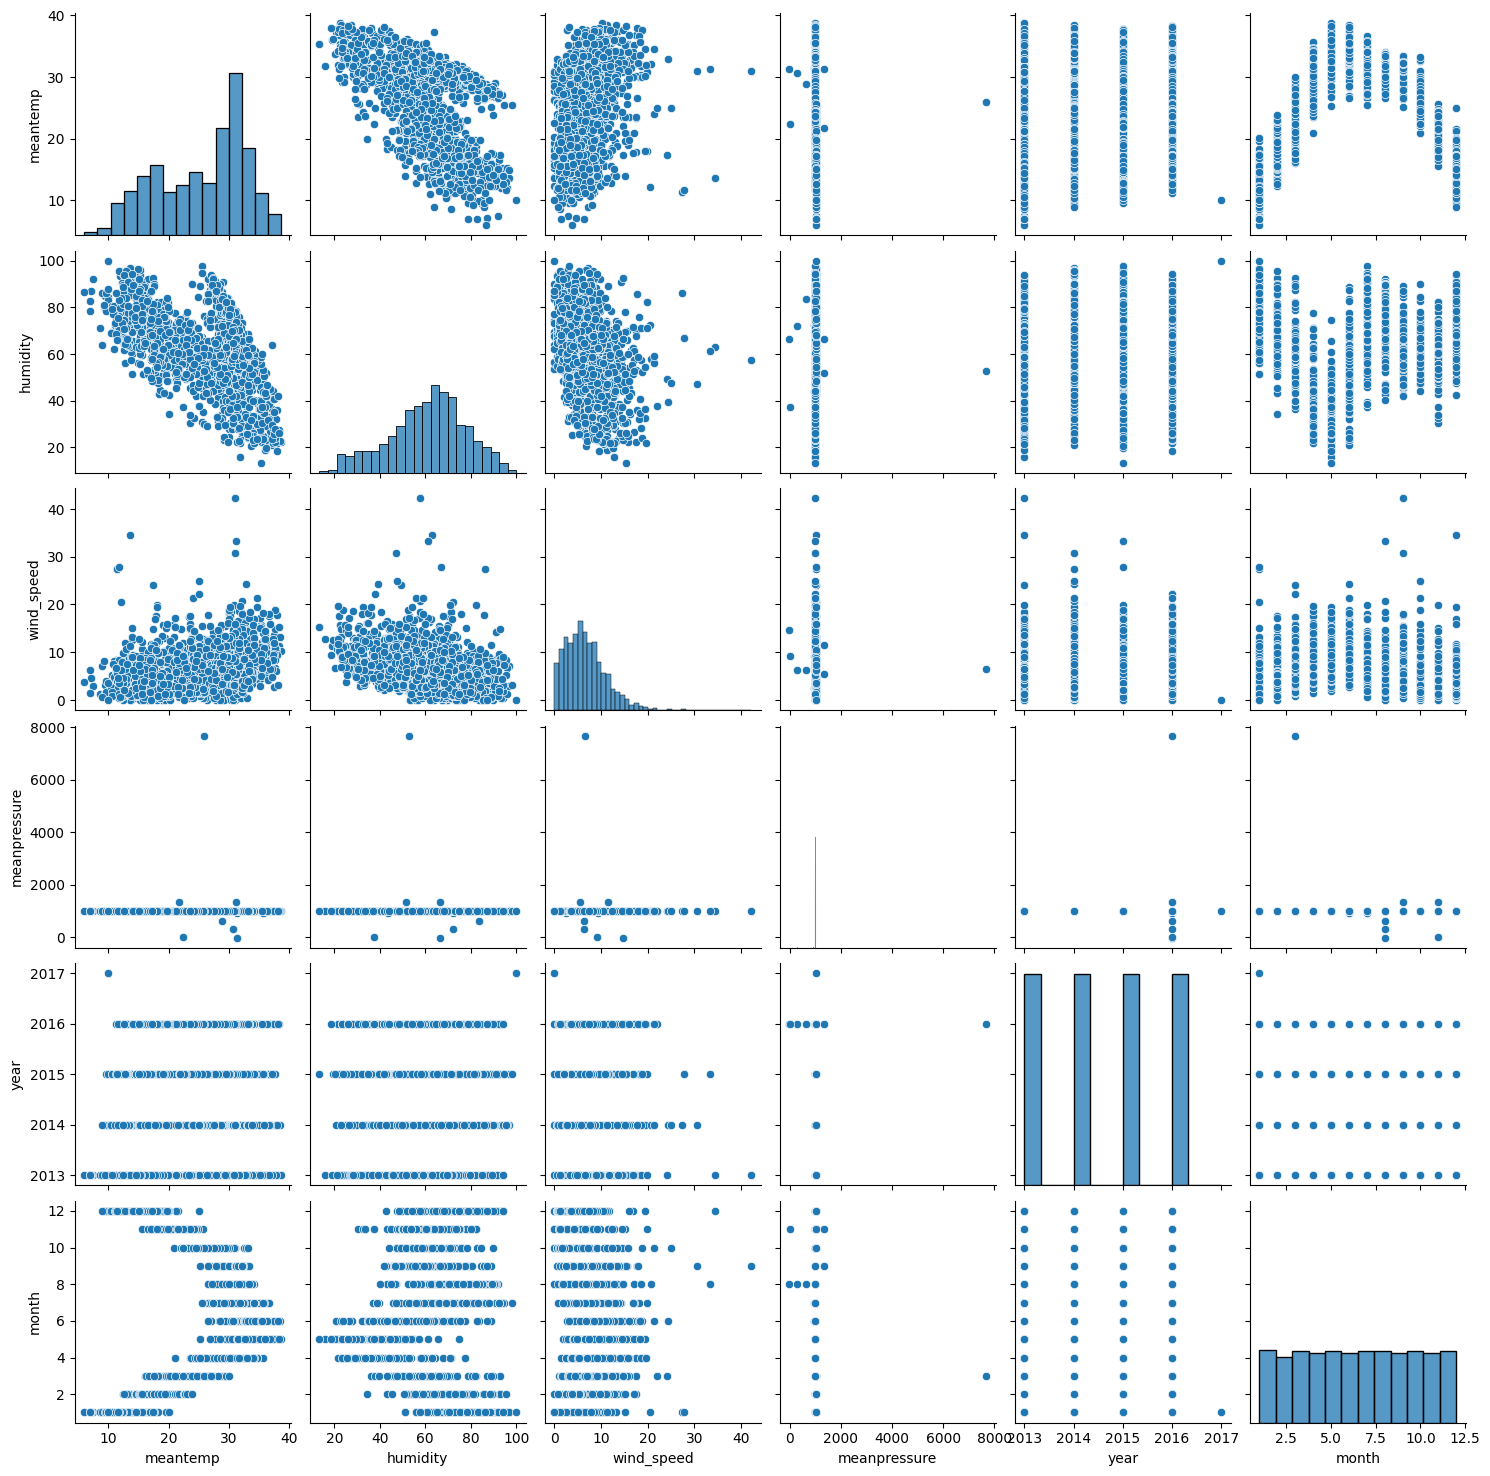

In [24]:
sns.pairplot(df_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month']])
plt.show()

In [25]:
#drop day name
df_train = df_train.drop(columns=['day_name'])
df_test = df_test.drop(columns=['day_name'])

In [26]:
print(df_train.columns)
print(df_test .columns)

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month'], dtype='object')
Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month'], dtype='object')


# **Split Data**

In [30]:
X_train = df_train.drop('meantemp', axis=1)
y_train = df_train['meantemp']

X_test = df_test.drop('meantemp', axis=1)
y_test = df_test['meantemp']

# **Normalizing**

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 2. Fit the scaler on the training data
#(fit ONLY on training data)
scaler = MinMaxScaler()

# 3. Scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# - X_train_scaled, y_train (for training)
# - X_test_scaled, y_test (for evaluation)

In [49]:
# Model dictionary
models = {
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR()
}

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np

# Train and evaluate models
ModelName = []
ModelAccuracy = []

for nameModel, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Predict on test data

    ModelName.append(nameModel)
    ModelAccuracy.append([
         mean_absolute_error(y_test, y_pred),
         mean_squared_error(y_test, y_pred),
         np.sqrt(mean_squared_error(y_test, y_pred)),
         r2_score(y_test, y_pred)
    ])
# Convert results to DataFrame
Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['MAE', 'MSE', 'RMSE', 'R2 Score'])
Model_accuracy

100%|██████████| 5/5 [00:00<00:00,  6.13it/s]


,MAE,MSE,RMSE,R2 Score
LinearRegression,4.982951,36.820273,6.067971,0.315092
KNeighborsRegressor,1.710688,5.983647,2.446149,0.888696
DecisionTreeRegressor,1.944481,7.251798,2.692916,0.865107
RandomForestRegressor,1.392493,3.716549,1.927835,0.930867
SVR,6.351995,62.272896,7.891318,-0.158362


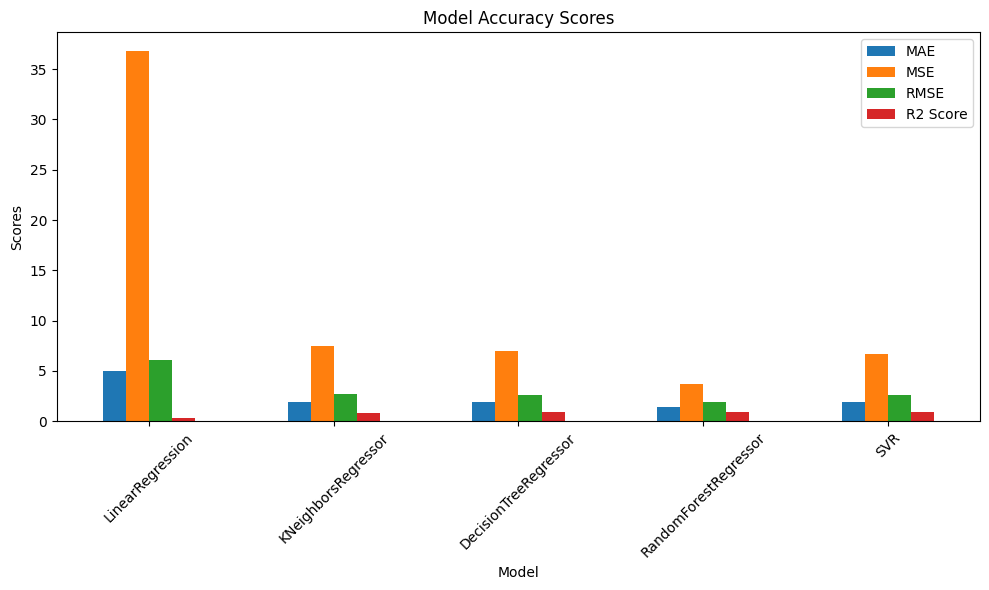

In [57]:
Model_accuracy.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45) # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout() # Adjust layout to fit labels

# Display the plot
plt.show()

# **Modelling**

In [51]:
X=df_train.drop('meantemp',axis=1)
y=df_train['meantemp']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
sc=StandardScaler()
X_train_scl=sc.fit_transform(X_train)
X_test_scl=sc.transform(X_test)

In [54]:
models={
    "LinearRegression":LinearRegression(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "SVR":SVR()
}

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np

# Train and evaluate models
ModelName = []
ModelAccuracy = []

for nameModel, model in tqdm(models.items()):
    model.fit(X_train_scl, y_train)
    y_pred = model.predict(X_test_scl)  # Predict on test data

    ModelName.append(nameModel)
    ModelAccuracy.append([
         mean_absolute_error(y_test, y_pred),
         mean_squared_error(y_test, y_pred),
         np.sqrt(mean_squared_error(y_test, y_pred)),
         r2_score(y_test, y_pred)
    ])
# Convert results to DataFrame
Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['MAE', 'MSE', 'RMSE', 'R2 Score'])
Model_accuracy

100%|██████████| 5/5 [00:00<00:00,  7.33it/s]


,MAE,MSE,RMSE,R2 Score
LinearRegression,4.982951,36.820273,6.067971,0.315092
KNeighborsRegressor,1.951208,7.447001,2.728919,0.861475
DecisionTreeRegressor,1.871271,6.986843,2.643264,0.870035
RandomForestRegressor,1.374426,3.728477,1.930926,0.930645
SVR,1.886776,6.717818,2.591875,0.875039


Best Model: The RandomForestRegressor is the best-performing model overall, with the lowest MSE and RMSE, and the highest R² score.

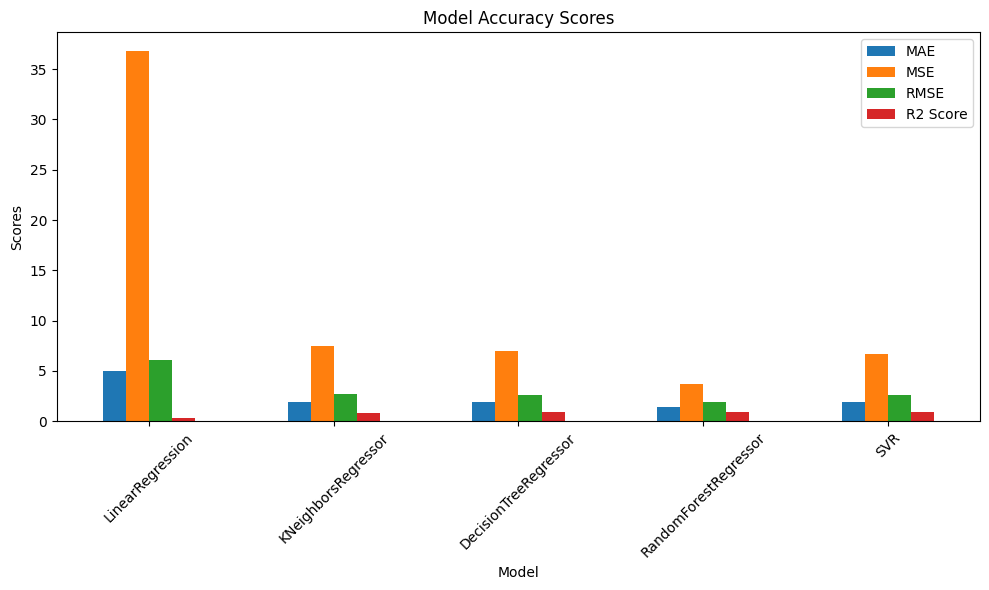

In [56]:
Model_accuracy.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45) # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout() # Adjust layout to fit labels

# Display the plot
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='r2')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best R² score on validation:", grid.best_score_)

# Use the best model
best_rf = grid.best_estimator_


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R² score on validation: 0.9338799685026117


In [66]:
# Predict using the best model
y_pred_best = best_rf.predict(X_test)

# Reshape y_test and y_pred_best to 2D arrays
y_test_2d = y_test.values.reshape(-1, 1)
y_pred_best_2d = y_pred_best.reshape(-1, 1)

# Inverse transform the scaled predictions
# Since we didn't scale the target variable, we don't need to inverse transform it
y_test_inv = y_test_2d  # No need for inverse_transform
y_pred_inv = y_pred_best_2d  # No need for inverse_transform

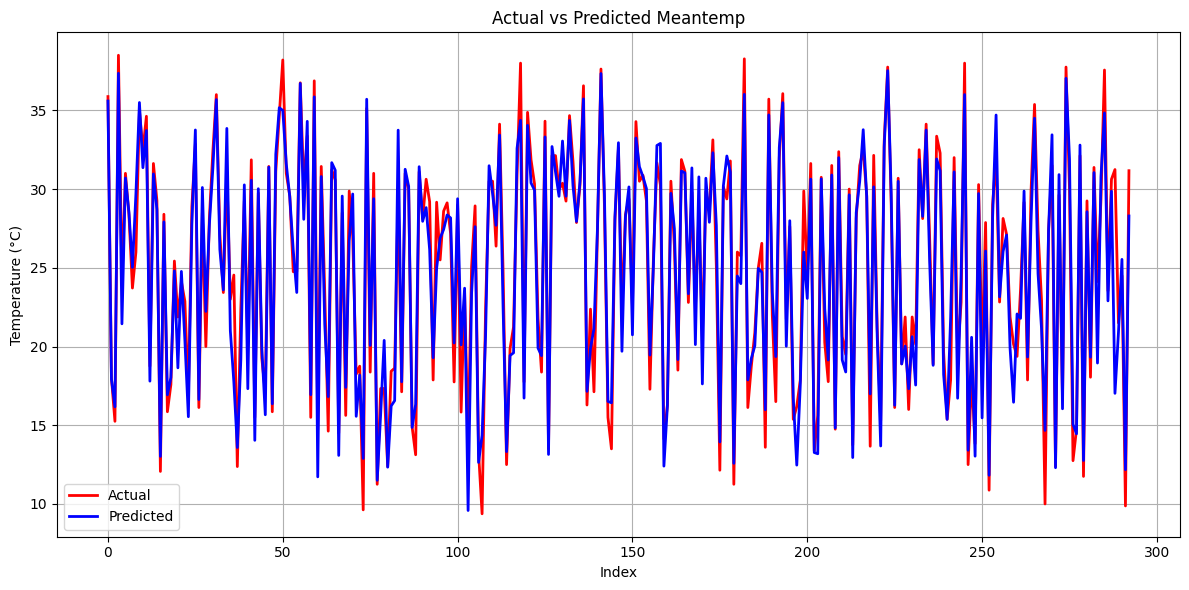

In [67]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(actual, predicted, title="Actual vs Predicted Meantemp"):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual', color='red', linewidth=2)
    plt.plot(predicted, label='Predicted', color='blue', linewidth=2)
    plt.xlabel("Index")
    plt.ylabel("Temperature (°C)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
plot_actual_vs_predicted(y_test_inv, y_pred_inv)
